**Exploratory data analysis**

In [434]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***TRAIN DATASET***

In [435]:
data=pd.read_csv('/content/train.csv')

In [436]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [437]:
data.shape

(54808, 14)

In [438]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


(array([50140.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  4668.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

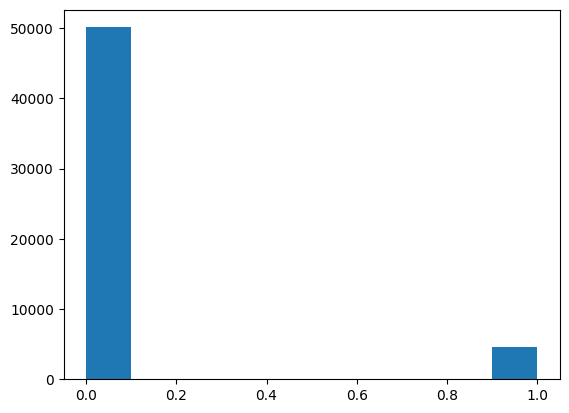

In [439]:
plt.hist(data['is_promoted'])

**Data Preprocessing**

Handling null values

In [440]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [441]:
data.isnull().sum()/len(data)*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [442]:
data['education']=data['education'].fillna(data['education'].mode()[0])

In [443]:
data['previous_year_rating'].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

(array([ 6223.,  4225., 18618., 21618.]),
 array([1., 2., 3., 4., 5.]),
 <BarContainer object of 4 artists>)

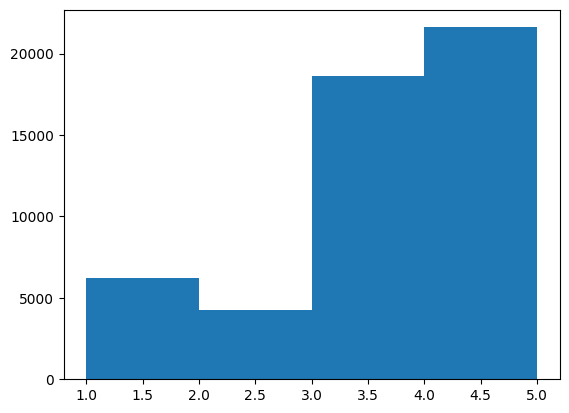

In [444]:
plt.hist(data['previous_year_rating'],bins=np.arange(1,6))

In [445]:
data['previous_year_rating']=data['previous_year_rating'].fillna(data['previous_year_rating'].median())

In [446]:
data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

Dropping features

In [447]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [448]:
data.drop(columns=['employee_id','department', 'region', 'education','recruitment_channel'],inplace=True)

In [449]:
data.head()

,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,f,1,35,5.0,8,1,0,49,0
1,m,1,30,5.0,4,0,0,60,0
2,m,1,34,3.0,7,0,0,50,0
3,m,2,39,1.0,10,0,0,50,0
4,m,1,45,3.0,2,0,0,73,0


Encoding

In [450]:
data['gender']=data['gender'].map({'f':0,'m':1})

In [451]:
data.head()

,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0,1,35,5.0,8,1,0,49,0
1,1,1,30,5.0,4,0,0,60,0
2,1,1,34,3.0,7,0,0,50,0
3,1,2,39,1.0,10,0,0,50,0
4,1,1,45,3.0,2,0,0,73,0


Defining x and y

In [452]:
data.head()

,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0,1,35,5.0,8,1,0,49,0
1,1,1,30,5.0,4,0,0,60,0
2,1,1,34,3.0,7,0,0,50,0
3,1,2,39,1.0,10,0,0,50,0
4,1,1,45,3.0,2,0,0,73,0


In [453]:
x=data.drop(columns=['is_promoted'])
y=data['is_promoted']


In [454]:
x.head()

,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0,1,35,5.0,8,1,0,49
1,1,1,30,5.0,4,0,0,60
2,1,1,34,3.0,7,0,0,50
3,1,2,39,1.0,10,0,0,50
4,1,1,45,3.0,2,0,0,73


In [455]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_promoted, dtype: int64

**Modelling**

**Logistic Regression Model**

In [456]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [457]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [458]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [459]:
y_pred = lr.predict(x_val)

In [460]:
from sklearn.metrics import f1_score
f1_score=f1_score(y_val,y_pred)
f1_score

0.11267605633802817

**kNN Model**

In [461]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [462]:
metric_k = []
n = np.arange(3,15)

for k in n:
  classifier = KNeighborsClassifier(n_neighbors = k,metric = 'euclidean')
  classifier.fit(x_train,y_train)
  y_pred = classifier.predict(x_val)
  acc = accuracy_score(y_val,y_pred)
  metric_k.append(acc)

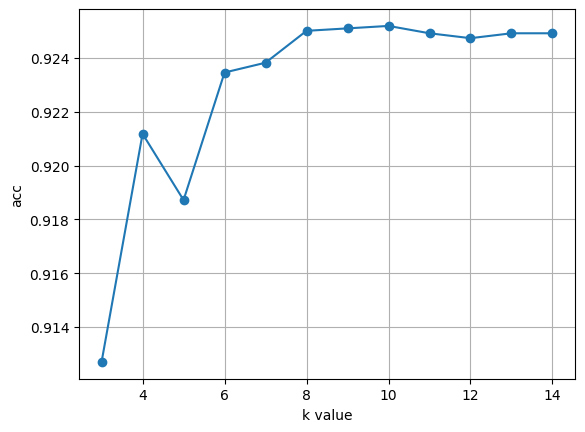

In [463]:
plt.plot(n,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('acc')
plt.grid()
plt.show()

In [464]:
from sklearn.metrics import f1_score
f1_score=f1_score(y_val,y_pred)
f1_score

0.19234543670264967

**Naive Bayes Model**

In [465]:
from sklearn.naive_bayes import GaussianNB


In [466]:
bay=GaussianNB()

In [467]:
bay.fit(x_train,y_train)

GaussianNB()

In [468]:
y_pred=bay.predict(x_val)

In [469]:
from sklearn.metrics import f1_score
f1_score=f1_score(y_val,y_pred)
f1_score

0.2012037833190026

**Decision Tree**

In [470]:
from sklearn.tree import DecisionTreeClassifier

In [471]:
dtc=DecisionTreeClassifier(criterion='entropy')

In [472]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [473]:
y_pred=dtc.predict(x_val)

In [474]:
from sklearn.metrics import f1_score
f1_score=f1_score(y_val,y_pred)
f1_score

0.2751091703056769

**Random Forest-gini**

In [475]:
from sklearn.ensemble import RandomForestClassifier

In [476]:
rfcg=RandomForestClassifier(n_estimators=100,random_state=42)
rfcg.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [477]:
y_pred=rfcg.predict(x_val)

In [478]:
from sklearn.metrics import f1_score
f1_score=f1_score(y_val,y_pred)
f1_score

0.2710843373493975

**Random Forest-entropy**

In [479]:
rfce=RandomForestClassifier(n_estimators=50,random_state=42,criterion='entropy')
rfce.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [480]:
y_pred=rfce.predict(x_val)

In [481]:
from sklearn.metrics import f1_score
f1_score=f1_score(y_val,y_pred)
f1_score

0.2811550151975684

AdaBoost

In [482]:
from sklearn.ensemble import AdaBoostClassifier

In [483]:
abc=AdaBoostClassifier(n_estimators=10)

In [484]:
abc.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=10)

In [485]:
y_pred=abc.predict(x_val)

In [486]:
from sklearn.metrics import f1_score
f1_score=f1_score(y_val,y_pred)
f1_score

0.2435897435897436

**Gradient Boost**

In [487]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf= GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=42)

In [488]:
gb_clf.fit(x_train,y_train)

GradientBoostingClassifier(random_state=42)

In [489]:
y_pred_gb=gb_clf.predict(x_val)


In [490]:
from sklearn.metrics import f1_score
f1_score=f1_score(y_val,y_pred)
f1_score


0.2435897435897436

XGBoost

In [491]:
import xgboost as xgb

In [492]:
xgb_clf=xgb.XGBClassifier()

In [493]:
xgb_clf.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [494]:
y_pred_xgb=xgb_clf.predict(x_val)

In [495]:
from sklearn.metrics import f1_score
f1_score=f1_score(y_val,y_pred)
f1_score

0.2435897435897436

***TEST DATASET***

In [496]:
data=pd.read_csv('/content/test.csv')

In [497]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [498]:
data.shape

(23490, 13)

In [499]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


**Data Preprocessing**

Handling null values

In [500]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [501]:
data.isnull().sum()/len(data)*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.401873
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.713921
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
dtype: float64

In [502]:
data['education']=data['education'].fillna(data['education'].mode()[0])

In [503]:
data['previous_year_rating'].unique()

array([nan,  3.,  1.,  2.,  4.,  5.])

(array([2680., 1731., 7921., 9346.]),
 array([1., 2., 3., 4., 5.]),
 <BarContainer object of 4 artists>)

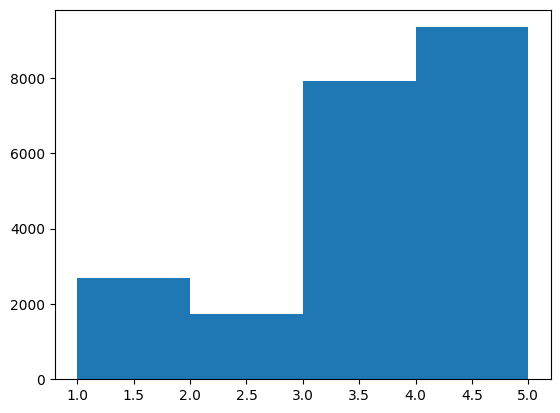

In [504]:
plt.hist(data['previous_year_rating'],bins=np.arange(1,6))

In [505]:
data['previous_year_rating']=data['previous_year_rating'].fillna(data['previous_year_rating'].median())

In [506]:
data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

Encoding

In [507]:
data['gender']=data['gender'].map({'f':0,'m':1})

In [508]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,1,sourcing,1,24,3.0,1,1,0,77
1,74430,HR,region_4,Bachelor's,0,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,1,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,0,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,1,sourcing,1,30,4.0,7,0,0,61


Defining x_test

In [509]:
x_test=data[['gender','no_of_trainings','age','previous_year_rating','length_of_service','KPIs_met >80%','awards_won?','avg_training_score']]

Predicting y value of adaboost

In [510]:
y_pred=abc.predict(x_test)

In [511]:
data['is_promoted']=y_pred

In [512]:
data['is_promoted'].value_counts()

0    23082
1      408
Name: is_promoted, dtype: int64

In [513]:
new_data=data[['employee_id','is_promoted']]

In [514]:
new_data

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [515]:
new_data.to_csv('/content/submission_file.csv',index=False)

Predicting y value of random forest using gini

In [516]:
y_pred=rfcg.predict(x_test)

In [517]:
data['is_promoted']=y_pred

In [518]:
data['is_promoted'].value_counts()

0    22591
1      899
Name: is_promoted, dtype: int64

In [519]:
new_data=data[['employee_id','is_promoted']]

In [520]:
new_data

,employee_id,is_promoted
0,8724,1
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [521]:
new_data.to_csv('/content/submission_file2.csv',index=False)

Predicting y value of random forest using entropy

In [522]:
y_pred=rfce.predict(x_test)

In [523]:
data['is_promoted']=y_pred

In [524]:
data['is_promoted'].value_counts()

0    22562
1      928
Name: is_promoted, dtype: int64

In [525]:
new_data=data[['employee_id','is_promoted']]

In [526]:
new_data

,employee_id,is_promoted
0,8724,1
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [527]:
new_data.to_csv('/content/submission_file3.csv',index=False)